In [3]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp

        C:\Users\USER\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
messages = [line.rstrip() for line in open("SMSSpamCollection")]
print(len(messages))

5574


In [4]:
messages[100]

"ham\tPlease don't text me anymore. I have nothing else to say."

In [6]:
for mes_no, message in enumerate(messages[:15]):
    print(mes_no, message)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [26]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [27]:
import pandas as pd

In [28]:
mes_new = pd.read_csv("SMSSpamCollection", sep="\t", names=["label", "message"])
mes_new.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [29]:
mes_new.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [30]:
mes_new.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [33]:
mes_new["length"] = mes_new["label"].apply(len)
mes_new.head(10)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",3
1,ham,Ok lar... Joking wif u oni...,3
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,4
3,ham,U dun say so early hor... U c already then say...,3
4,ham,"Nah I don't think he goes to usf, he lives aro...",3
5,spam,FreeMsg Hey there darling it's been 3 week's n...,4
6,ham,Even my brother is not like to speak with me. ...,3
7,ham,As per your request 'Melle Melle (Oru Minnamin...,3
8,spam,WINNER!! As a valued network customer you have...,4
9,spam,Had your mobile 11 months or more? U R entitle...,4


In [34]:
mes_new["length"] = mes_new["message"].apply(len)
mes_new.head(10)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Frequency'>

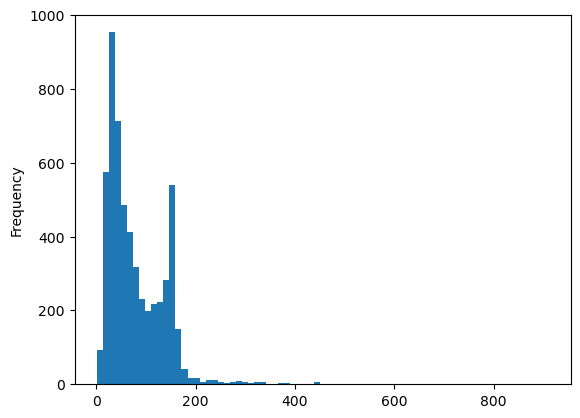

In [38]:
mes_new["length"].plot.hist(bins=75)

<Axes: ylabel='Frequency'>

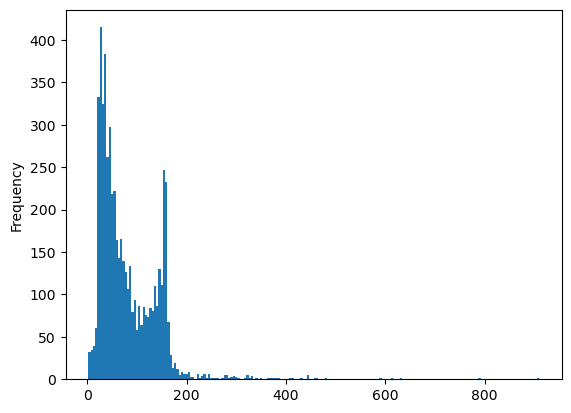

In [39]:
mes_new["length"].plot.hist(bins=200)

In [41]:
mes_new["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [42]:
mes_new[mes_new["length"] == 910]  

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [46]:
mes_new[mes_new["length"] == 910]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

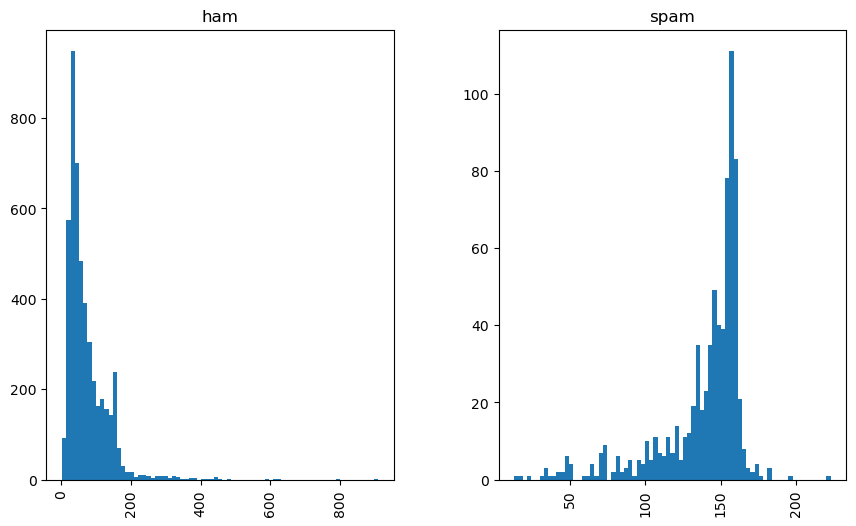

In [50]:
mes_new.hist(column="length", by="label", bins=75, figsize=(10,6))

In [51]:
import string

In [52]:
mess = "Sample message! Notice: it has punctuation"

In [53]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
no_punc = [n for n in mess if n not in string.punctuation]
no_punc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [55]:
from nltk.corpus import stopwords

In [56]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
no_punc = "".join(no_punc)
no_punc

'Sample message Notice it has punctuation'

In [58]:
no_punc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [59]:
clean_mess = [word for word in no_punc.split() if word.lower() not in stopwords.words("english")]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [74]:
def text_process(mess):
    """
    1. Remove punc
    2. Remove stopwords
    3. Return list of clean text words
    """
    
    # Check if the input is a string
    if not isinstance(mess, str):
        return mess
    
    # Remove punctuation
    no_punc = [char for char in mess if char not in string.punctuation]
    
    # Join the characters back into a string
    no_punc = ''.join(no_punc)
    
    # Remove stopwords and return the list of clean words
    return [word for word in no_punc.split() if word.lower() not in stopwords.words("english")]

In [75]:
mes_new.head(10)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [77]:
mes_new['message'].head(10).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
8    [WINNER, valued, network, customer, selected, ...
9    [mobile, 11, months, U, R, entitled, Update, l...
Name: message, dtype: object

# Vectorization

We need to convert the messages, currently represented as lists of tokens (lemmas), into vectors that can be processed by SciKit Learn's algorithm models.

To achieve this, we will use the bag-of-words method, which involves three key steps:

Count the occurrences: Determine how many times each word appears in each message (known as term frequency).

Weigh the counts: Adjust the counts so that more common words receive lower weights (using inverse document frequency).

Normalize the vectors: Scale the vectors to unit length to remove the influence of message length (using L2 normalization).

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(mes_new["message"])

In [81]:
print(len(bow_transformer.vocabulary_))

11425


In [82]:
mess4 = mes_new["message"][3]
print(mess4)

U dun say so early hor... U c already then say...


In [83]:
bow4 = bow_transformer.transform([mess4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [84]:
print(bow4.shape)

(1, 11425)


In [85]:
bow_transformer.get_feature_names_out()[4068]

'U'

In [86]:
bow_transformer.get_feature_names_out()[9554]

'say'

In [87]:
mes_bow = bow_transformer.transform(mes_new["message"])

In [88]:
print("Shape of Sparse Matrix: ", mes_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [89]:
mes_bow.nnz

50548

In [91]:
sparsity = (100.0 * mes_bow.nnz / (mes_bow.shape[0] * mes_bow.shape[1]))
print("sparsity: {}".format((sparsity)))

sparsity: 0.07940295412668218


In [92]:
sparsity = (100.0 * mes_bow.nnz / (mes_bow.shape[0] * mes_bow.shape[1]))
print("sparsity: {}".format(round(sparsity)))

sparsity: 0


In [93]:
from sklearn.feature_extraction.text import TfidfTransformer

In [95]:
tfidf_transformer = TfidfTransformer().fit(mes_bow)

tfidf_transformer

TfidfTransformer()

In [96]:
tfidf4 = tfidf_transformer.transform(bow4)

print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [97]:
# Let's Assume
tfidf_transformer.idf_[bow_transformer.vocabulary_["university"]]

8.527076498901426

In [98]:
mess_tfidf = tfidf_transformer.transform(mes_bow)

mess_tfidf

<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [99]:
from sklearn.naive_bayes import MultinomialNB

In [100]:
spam_detect_model = MultinomialNB().fit(mess_tfidf, mes_new["label"])

In [103]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [105]:
all_pred = spam_detect_model.predict(mess_tfidf)

all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
msg_train, msg_test, label_train, label_test = train_test_split(
    mes_new["message"], mes_new["label"], test_size=0.33, random_state=42)

In [108]:
from sklearn.pipeline import Pipeline

In [109]:
pipeline = Pipeline([
    ("bow", CountVectorizer(analyzer=text_process)),
    ("tfidf", TfidfTransformer()),
    ("classifier", MultinomialNB())
])

In [110]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002C2ED436170>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [111]:
pred = pipeline.predict(msg_test)

In [112]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(label_test, pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.74      0.85       246

    accuracy                           0.96      1839
   macro avg       0.98      0.87      0.91      1839
weighted avg       0.97      0.96      0.96      1839



In [114]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
pipeline = Pipeline([
    ("bow", CountVectorizer(analyzer=text_process)),
    ("tfidf", TfidfTransformer()),
    ("classifier", RandomForestClassifier())
])

pipeline.fit(msg_train, label_train)

pred = pipeline.predict(msg_test)

print(classification_report(label_test, pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1593
        spam       1.00      0.81      0.89       246

    accuracy                           0.97      1839
   macro avg       0.99      0.90      0.94      1839
weighted avg       0.98      0.97      0.97      1839

